In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
iris = load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

#print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


In [3]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
%%time
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
              'multi_class' : ['ovr'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[3000, 5000, 10000, 20000],
              'C': [0.1, 0.5, 1, 10, 15, 50]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)
params_optimal = lg_reg_cv.best_params_
print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s


Best Score (accuracy): 0.966667
Optimal Hyperparameter Values:  {'C': 15, 'max_iter': 3000, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.0001}


CPU times: user 522 ms, sys: 22.5 ms, total: 544 ms
Wall time: 6.02 s


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    6.0s finished


In [9]:
lg_reg_clf = LogisticRegression(**params_optimal)
lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=15, max_iter=3000, multi_class='ovr', solver='saga')

In [15]:
y_test_predicted = lg_reg_clf.predict(X_test)
accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.9666666666666667

Test Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [21]:
%%time
param_grid_sm = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                 'multi_class': ['multinomial'],
                 'tol': [1e-3, 1e-4, 1e-5],
                 'max_iter': [3000, 5000, 10000, 20000],
                 'C': [0.1, 0.5, 1, 10, 15, 50]}
lg_reg_sm = LogisticRegression()
lg_reg_sm_cv = GridSearchCV(lg_reg_sm, param_grid_sm, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
lg_reg_sm_cv.fit(X_train, y_train)
params_optimal_sm = lg_reg_sm_cv.best_params_
print("Best Score (accuracy): %f" % lg_reg_sm_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sm)
print("\n")

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s


Best Score (accuracy): 0.966667
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 3000, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: user 511 ms, sys: 66 ms, total: 577 ms
Wall time: 7.87 s


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    7.8s finished


In [22]:
softmax_reg = LogisticRegression(**params_optimal_sm)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=3000, multi_class='multinomial',
                   solver='newton-cg', tol=0.001)

In [23]:
print("No. of Iterations:", softmax_reg.n_iter_ )


y_test_predicted = softmax_reg.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [10]

Test Accuracy:  0.9666666666666667

Test Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [24]:
def decision_boundary_various_thresholds(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)
    
    
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()

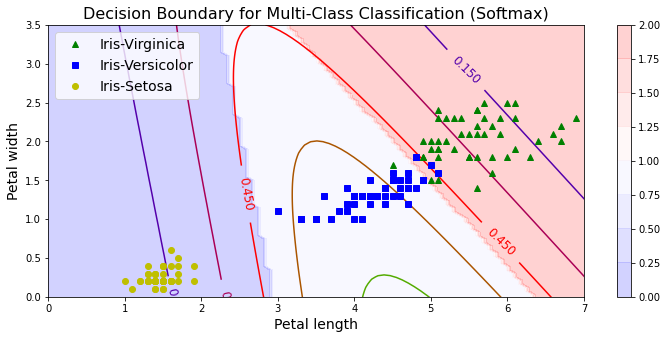

In [25]:
plt.figure(figsize=(12, 5))

decision_boundary_class_colored(softmax_reg, X, plotDistanceFromHyperplane=False)

decision_boundary_various_thresholds(softmax_reg, X)


plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")


plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Decision Boundary for Multi-Class Classification (Softmax)", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()

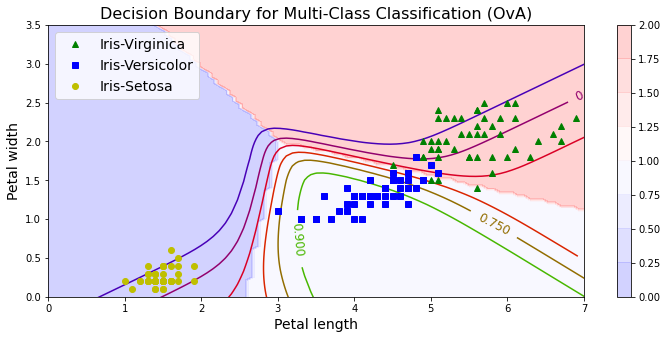

In [26]:
plt.figure(figsize=(12, 5))

decision_boundary_class_colored(lg_reg_clf, X, plotDistanceFromHyperplane=False)

decision_boundary_various_thresholds(lg_reg_clf, X)


plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")


plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Decision Boundary for Multi-Class Classification (OvA)", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()